In [189]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib


In [190]:
d=pd.read_csv(r'C:/Users/Acer/Downloads/tabela_producao_oleo.csv')

In [191]:
d

,Estado,Bacia,NP_ANP,NP_Operador,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),GN_Associado,GN_Não associado,GN_Gás Total,Volume Gás,Água (bbl/dia),Instalação Destino,Tipo Instalação,Tempo de Produção (hs por mês)
0,Sergipe,Sergipe,7-GA-7D-SES,7GA 0007D SES,GUARICEMA,Petrobras,480000038399796,2005/01,76.5937,0.0,76.5937,0.0000,0.0,0.0000,0.00000,7.0405,NaN,NaN,31.0
1,Sergipe,Sergipe,7-GA-66D-SES,7GA66DSES,GUARICEMA,Petrobras,480000038399796,2005/01,71.3589,0.0,71.3589,0.0000,0.0,0.0000,0.00000,143.9758,NaN,NaN,31.0
2,Sergipe,Sergipe,7-GA-35D-SES,7GA 0035D SES,GUARICEMA,Petrobras,480000038399796,2005/01,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.00000,0.0000,NaN,NaN,31.0
3,Sergipe,Sergipe,7-GA-30-SES,7GA 0030 SES,GUARICEMA,Petrobras,480000038399796,2005/01,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.00000,0.0000,NaN,NaN,31.0
4,Sergipe,Sergipe,7-GA-58D-SES,7GA 0058D SES,GUARICEMA,Petrobras,480000038399796,2005/01,423.0607,0.0,423.0607,0.0000,0.0,0.0000,0.00000,1.8667,NaN,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109396,Bahia,Recôncavo,7-BA-73-BA,7BA 0073 BA,BURACICA,Petrobras,480000036359746,2022/03,9.2101,0.0,9.2101,0.0094,0.0,0.0094,0.29038,739.4759,Estação Coletora Pereira,INSTALACAO EMB/DESEMB,698.0
2109397,Bahia,Recôncavo,7-BA-75-BA,7BA 0075 BA,BURACICA,Petrobras,480000036359746,2022/03,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.00000,0.0000,NaN,NaN,0.0
2109398,Bahia,Recôncavo,7-BA-81-BA,7BA 0081 BA,BURACICA,Petrobras,480000036359746,2022/03,0.5503,0.0,0.5503,0.0042,0.0,0.0042,0.13072,143.1695,Estação Coletora Lameiro,INSTALACAO EMB/DESEMB,41.0
2109399,Bahia,Recôncavo,7-BA-92-BA,7BA 0092 BA,BURACICA,Petrobras,480000036359746,2022/03,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.00000,0.0000,NaN,NaN,0.0


In [192]:
d=d.drop_duplicates()

In [193]:
d['Período']=pd.to_datetime(d['Período'])

In [194]:
group_data=d.groupby('Período').agg({'Óleo (bbl/dia)':'sum'}).reset_index()

In [195]:
group_data = group_data.set_index('Período')
group_data.index
y = group_data['Óleo (bbl/dia)'].resample('MS').mean()

In [196]:
y

Período
2005-01-01    1.495900e+06
2005-02-01    1.490794e+06
2005-03-01    1.536851e+06
2005-04-01    1.675473e+06
2005-05-01    1.687871e+06
                  ...     
2021-11-01    2.843323e+06
2021-12-01    2.829640e+06
2022-01-01    3.024642e+06
2022-02-01    2.908821e+06
2022-03-01    2.973112e+06
Freq: MS, Name: Óleo (bbl/dia), Length: 207, dtype: float64

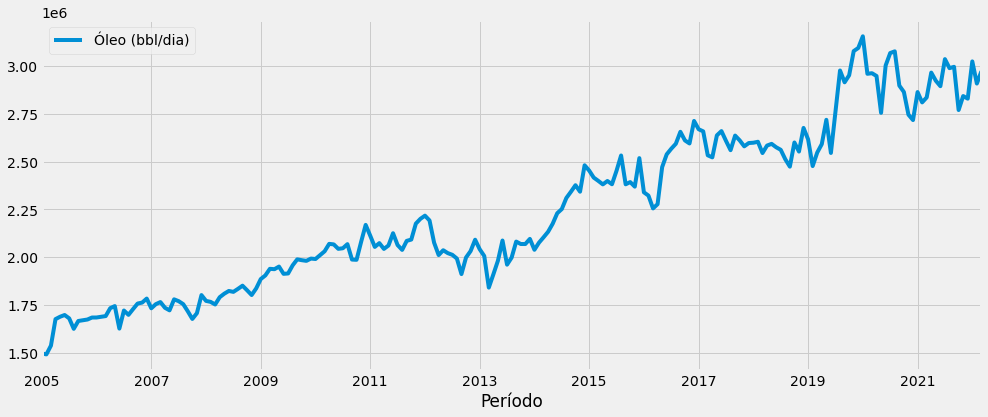

In [197]:
group_data.plot(figsize=(15, 6))
plt.show()

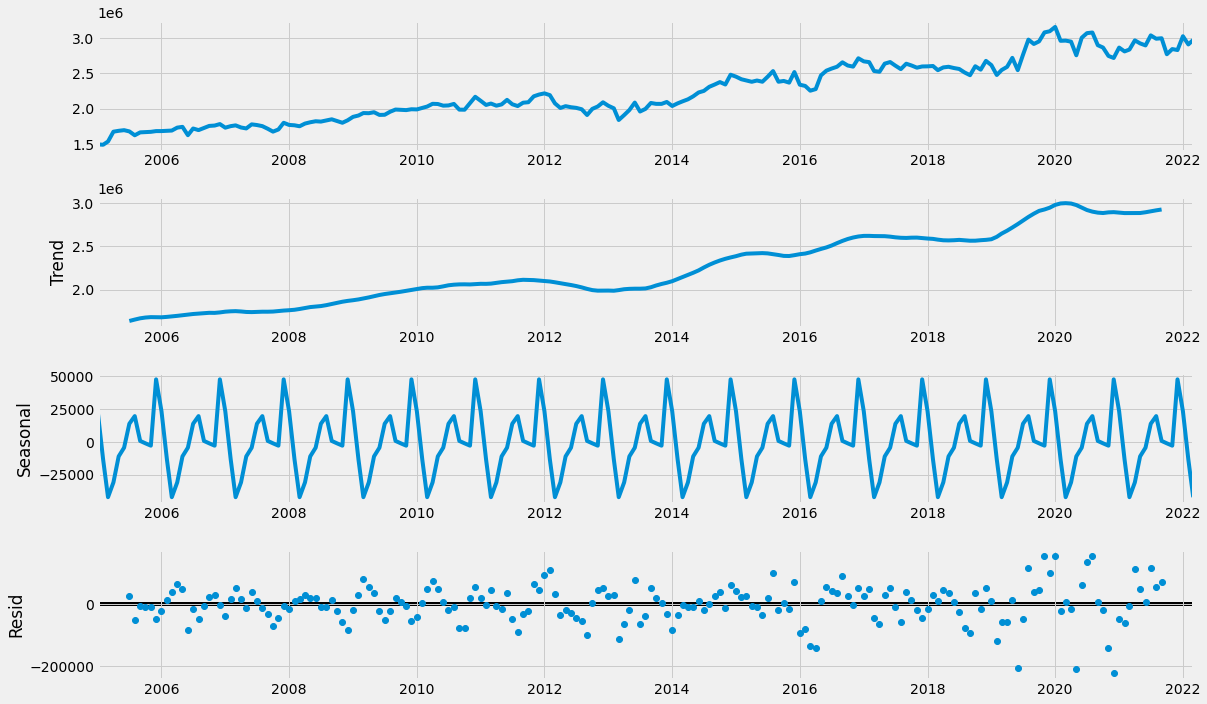

In [198]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
decomposition = sm.tsa.seasonal_decompose(group_data, model='additive')
fig = decomposition.plot()
plt.show()

### find linear regression

In [199]:
def linreg(X, Y):

    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


In [200]:
# add an index
group_data['Index'] = range(1, 1+len(group_data))

In [201]:
#: Get the values
values = group_data['Óleo (bbl/dia)'].values

In [202]:
#: Find the trend
b1, b0 = linreg( range(len(values)), values )

In [203]:
#: Add the trend to dataset (y = index * b1 + b0)
group_data['Trend'] = group_data['Index'] * b1 + b0

In [204]:
#no need index column anymore
del group_data['Index']

In [205]:
group_data

,Óleo (bbl/dia),Trend
Período,,
2005-01-01,1.495900e+06,1.545599e+06
2005-02-01,1.490794e+06,1.552453e+06
2005-03-01,1.536851e+06,1.559307e+06
2005-04-01,1.675473e+06,1.566161e+06
2005-05-01,1.687871e+06,1.573016e+06
...,...,...
2021-11-01,2.843323e+06,2.930139e+06
2021-12-01,2.829640e+06,2.936993e+06
2022-01-01,3.024642e+06,2.943847e+06


In [206]:
lag_dict={}
for i in range(1, 31):
    lag_dict[i]=group_data['Óleo (bbl/dia)'].corr( group_data['Óleo (bbl/dia)'].shift(i))

In [207]:
#Sort descending a dictionary by value
import operator

sorted_d = dict( sorted(lag_dict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_d)


#choose first 4 i to create lag
l=[]
for x in list(sorted_d)[0:4]:
    l.append(x)
print (l)

Dictionary in descending order by value :  {1: 0.985133493670636, 2: 0.9748984812296824, 3: 0.966804717129886, 4: 0.96258216792152, 5: 0.9579918792375375, 6: 0.9535728902849753, 7: 0.9495541021485804, 8: 0.9433482760168529, 9: 0.9375344622599427, 10: 0.9349618943091978, 11: 0.9315168972458758, 12: 0.9277164430209418, 13: 0.9196988459417692, 14: 0.9103702536120477, 18: 0.906834422681402, 15: 0.9066216131597316, 17: 0.9063721332708227, 19: 0.9061009217994317, 20: 0.9053148738134992, 16: 0.903348882162688, 21: 0.901934084496253, 30: 0.9017721820290452, 22: 0.9003169111644362, 23: 0.898548172896159, 24: 0.897706564965258, 29: 0.8969987013040379, 28: 0.894886157722682, 27: 0.894162699227978, 25: 0.8940655919415841, 26: 0.8938176425499799}
[1, 2, 3, 4]


In [208]:
# Lag
for i in l:
    group_data['Lag',i]=group_data['Óleo (bbl/dia)'].shift(i)

In [209]:
group_data

,Óleo (bbl/dia),Trend,"(Lag, 1)","(Lag, 2)","(Lag, 3)","(Lag, 4)"
Período,,,,,,
2005-01-01,1.495900e+06,1.545599e+06,NaN,NaN,NaN,NaN
2005-02-01,1.490794e+06,1.552453e+06,1.495900e+06,NaN,NaN,NaN
2005-03-01,1.536851e+06,1.559307e+06,1.490794e+06,1.495900e+06,NaN,NaN
2005-04-01,1.675473e+06,1.566161e+06,1.536851e+06,1.490794e+06,1.495900e+06,NaN
2005-05-01,1.687871e+06,1.573016e+06,1.675473e+06,1.536851e+06,1.490794e+06,1.495900e+06
...,...,...,...,...,...,...
2021-11-01,2.843323e+06,2.930139e+06,2.770098e+06,2.996401e+06,2.989459e+06,3.036639e+06
2021-12-01,2.829640e+06,2.936993e+06,2.843323e+06,2.770098e+06,2.996401e+06,2.989459e+06
2022-01-01,3.024642e+06,2.943847e+06,2.829640e+06,2.843323e+06,2.770098e+06,2.996401e+06


____

In [210]:
# Moving average
ma_dict={}
for i in range(1, 31):
    ma_dict[i]=group_data['Óleo (bbl/dia)'].corr( group_data['Óleo (bbl/dia)'].rolling(i, closed = 'left').mean())

In [211]:
#Sort descending a dictionary by value
import operator

ma_dict = dict( sorted(ma_dict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',ma_dict)


#choose first 4 i to create moving average
ma_list=[]
for x in list(ma_dict)[0:4]:
    ma_list.append(x)
print (ma_list)

Dictionary in descending order by value :  {1: 0.985133493670636, 2: 0.9835976210538495, 3: 0.9814372406026258, 4: 0.9801896653163183, 5: 0.9788620831076211, 6: 0.9774570844689104, 7: 0.9760135022614544, 8: 0.9742372623987051, 9: 0.9723806505972633, 10: 0.9707853021767651, 11: 0.9692779434627145, 12: 0.9678038622191747, 13: 0.9660030941968637, 14: 0.9638640479392795, 15: 0.9618529324453946, 16: 0.9600057670195502, 17: 0.9586289134984896, 18: 0.957392109666025, 19: 0.9562972887235344, 20: 0.9552277294571256, 21: 0.9541186644400745, 22: 0.95309638632397, 23: 0.9520986343288921, 24: 0.9512079187775463, 25: 0.9501342081730734, 26: 0.9491620931196489, 27: 0.9482301760995455, 28: 0.9472998706586568, 29: 0.946448441491503, 30: 0.9458572439950115}
[1, 2, 3, 4]


In [212]:
# Moving average
for i in ma_list:
    group_data['MA',i]=group_data['Óleo (bbl/dia)'].rolling(i, closed = 'left').mean()

In [213]:
group_data = group_data.dropna()

In [214]:
group_data=group_data.reset_index()

In [215]:
group_data

,Período,Óleo (bbl/dia),Trend,"(Lag, 1)","(Lag, 2)","(Lag, 3)","(Lag, 4)","(MA, 1)","(MA, 2)","(MA, 3)","(MA, 4)"
0,2005-05-01,1.687871e+06,1.573016e+06,1.675473e+06,1.536851e+06,1.490794e+06,1.495900e+06,1.675473e+06,1.606162e+06,1.567706e+06,1.549755e+06
1,2005-06-01,1.697018e+06,1.579870e+06,1.687871e+06,1.675473e+06,1.536851e+06,1.490794e+06,1.687871e+06,1.681672e+06,1.633398e+06,1.597747e+06
2,2005-07-01,1.679474e+06,1.586724e+06,1.697018e+06,1.687871e+06,1.675473e+06,1.536851e+06,1.697018e+06,1.692444e+06,1.686787e+06,1.649303e+06
3,2005-08-01,1.624673e+06,1.593578e+06,1.679474e+06,1.697018e+06,1.687871e+06,1.675473e+06,1.679474e+06,1.688246e+06,1.688121e+06,1.684959e+06
4,2005-09-01,1.665748e+06,1.600432e+06,1.624673e+06,1.679474e+06,1.697018e+06,1.687871e+06,1.624673e+06,1.652074e+06,1.667055e+06,1.672259e+06
...,...,...,...,...,...,...,...,...,...,...,...
198,2021-11-01,2.843323e+06,2.930139e+06,2.770098e+06,2.996401e+06,2.989459e+06,3.036639e+06,2.770098e+06,2.883250e+06,2.918653e+06,2.948149e+06
199,2021-12-01,2.829640e+06,2.936993e+06,2.843323e+06,2.770098e+06,2.996401e+06,2.989459e+06,2.843323e+06,2.806710e+06,2.869941e+06,2.899820e+06
200,2022-01-01,3.024642e+06,2.943847e+06,2.829640e+06,2.843323e+06,2.770098e+06,2.996401e+06,2.829640e+06,2.836482e+06,2.814354e+06,2.859866e+06
201,2022-02-01,2.908821e+06,2.950701e+06,3.024642e+06,2.829640e+06,2.843323e+06,2.770098e+06,3.024642e+06,2.927141e+06,2.899202e+06,2.866926e+06


___

### Modelling

In [216]:
del group_data['Período']

In [217]:
x=group_data.loc[:, group_data.columns!='Óleo (bbl/dia)']

y=group_data['Óleo (bbl/dia)']



In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)



In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso



prediction=RandomForestRegressor()
regr = LinearRegression()
boost=XGBRegressor()
lasso=Lasso()


prediction.fit(x_train, y_train)
regr.fit(x_train, y_train)
boost.fit(x_train, y_train)
lasso.fit(x_train, y_train)

result=prediction.predict(x_test)
result_regr=regr.predict(x_test)
result_boost=boost.predict(x_test)
result_lasso=lasso.predict(x_test)


from sklearn.metrics import r2_score


In [220]:
score_random_f=r2_score(result, y_test)
score_linear_reg=regr.score( x_test, y_test ) 
score_boost=boost.score( x_test, y_test ) 
score_lasso=lasso.score(x_test, y_test)


In [221]:
score_random_f

0.9687492059044129

In [222]:
score_linear_reg

0.9760176060009512

In [223]:
score_boost

0.9562885677963491

In [224]:
score_lasso

0.9760375116328643

___

In [225]:
x_test['pred_linear_reg'] = result_regr
x_test['pred_lasso']=result_lasso
x_test['real'] = y_test


In [226]:
real_pred=x_test.iloc[:, -2:]

In [227]:
real_pred=real_pred.sort_index(ascending=True)

In [228]:
real_pred

,pred_lasso,real
4,1.625209e+06,1.665748e+06
5,1.661254e+06,1.669294e+06
7,1.662230e+06,1.683803e+06
8,1.675837e+06,1.683989e+06
12,1.720512e+06,1.743757e+06
...,...,...
186,2.886295e+06,2.745998e+06
187,2.800202e+06,2.717654e+06
191,2.840461e+06,2.966083e+06
196,2.989785e+06,2.996401e+06


___

In [229]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [230]:

tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(group_data):
    cv_train, cv_test = group_data.iloc[train_index], group_data.iloc[test_index]
    rmse.append(np.sqrt(mean_squared_error(result_lasso, y_test)))

In [231]:
print(np.mean(rmse))

61805.15663736267


In [232]:
group_data['Óleo (bbl/dia)'].mean()

2258416.9924556646

In [233]:
np.mean(rmse)/group_data['Óleo (bbl/dia)'].mean()

0.027366583250048752

In [234]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(result_lasso, y_test)

In [235]:
mape

0.017659217563661775

In [236]:
real_pred['pred_lasso'].corr(real_pred['real'])

0.9884827308586025

___

In [237]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, gap=1)
df = group_data.sort_index()

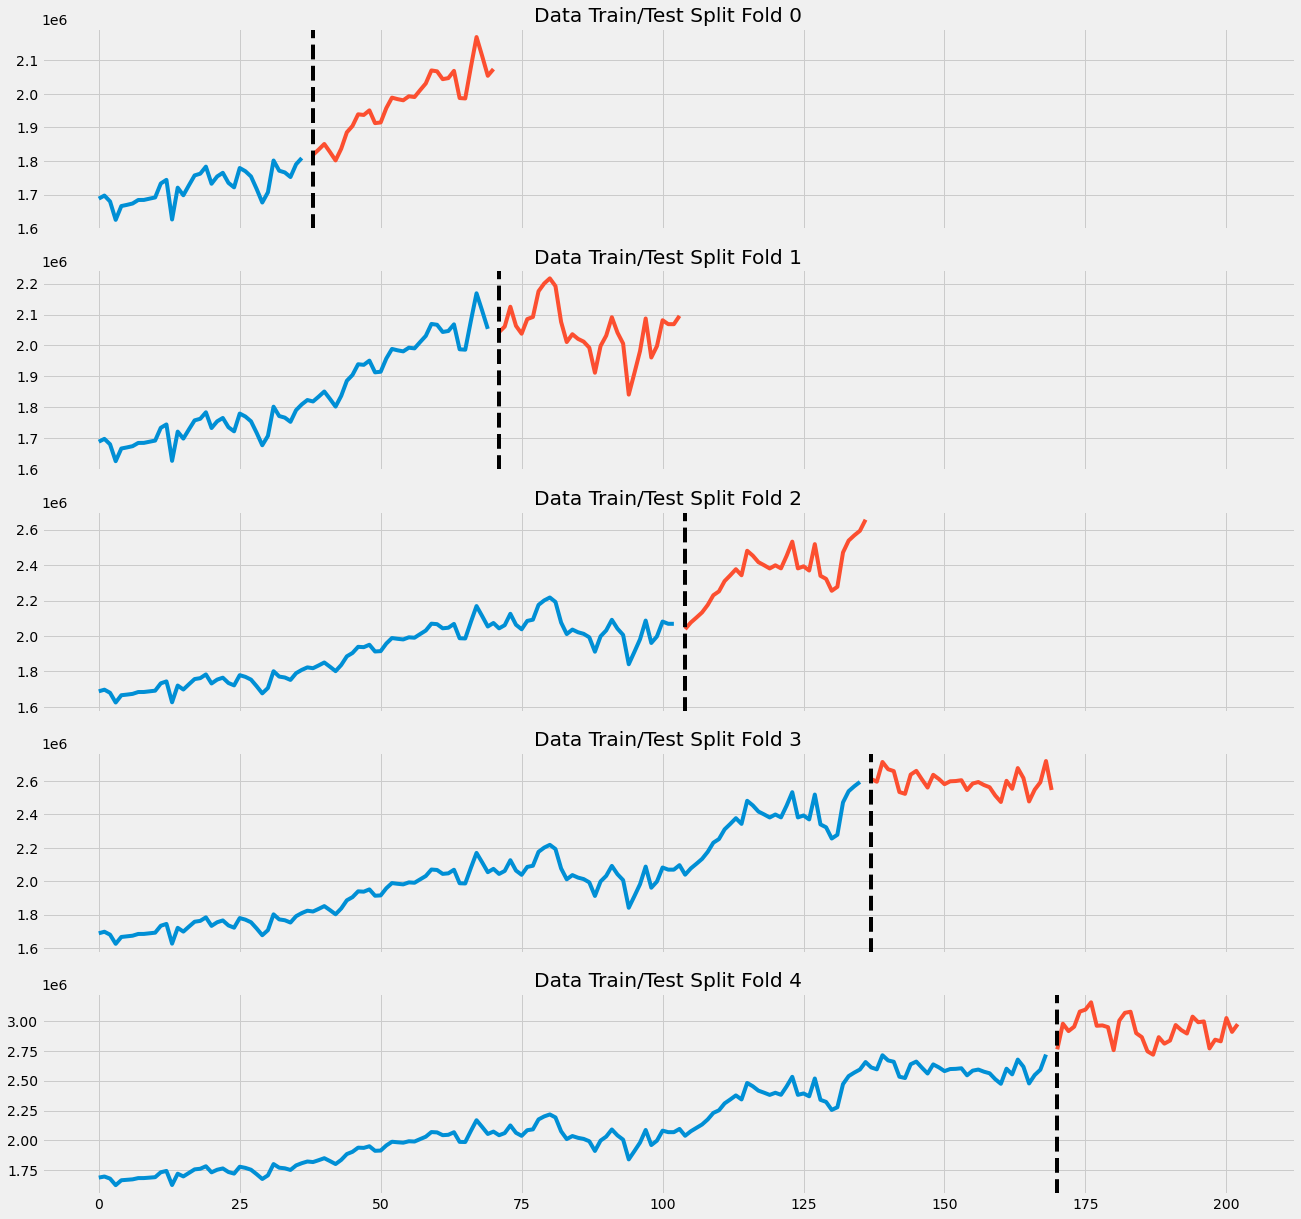

In [238]:
fig, axs = plt.subplots(5, 1, figsize=(20, 20), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['Óleo (bbl/dia)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Óleo (bbl/dia)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

___

### compare actaul and predicted values

In [239]:
real_pred

,pred_lasso,real
4,1.625209e+06,1.665748e+06
5,1.661254e+06,1.669294e+06
7,1.662230e+06,1.683803e+06
8,1.675837e+06,1.683989e+06
12,1.720512e+06,1.743757e+06
...,...,...
186,2.886295e+06,2.745998e+06
187,2.800202e+06,2.717654e+06
191,2.840461e+06,2.966083e+06
196,2.989785e+06,2.996401e+06


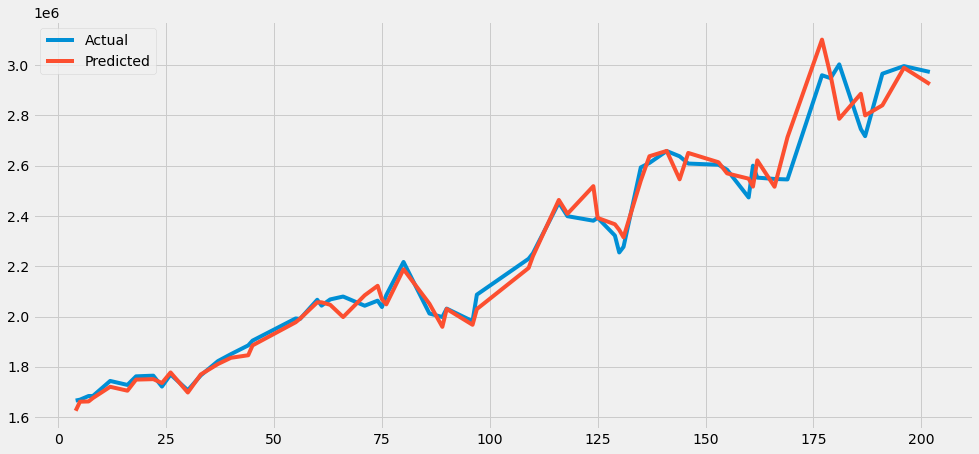

In [240]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(real_pred['real'], label='Actual')
plt.plot(real_pred['pred_lasso'], label='Predicted')
plt.legend()
plt.show()

___

#### Next month

___

In [241]:
data=d.groupby('Período').agg({'Óleo (bbl/dia)':'sum'}).reset_index()

In [242]:
def linreg(X, Y):

    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


In [260]:
df['Index'] = range(1, 1+len(data[:203]))

values = df['Óleo (bbl/dia)'].values

b1, b0 = linreg( range(len(values)), values )

df['Trend'] = df['Index'] * b1 + b0

del df['Index']

In [261]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    
    return df

df = create_features(df)


In [262]:
create_features(data)

,Período,Óleo (bbl/dia)
0,2005-01-01,1.495900e+06
1,2005-02-01,1.490794e+06
2,2005-03-01,1.536851e+06
3,2005-04-01,1.675473e+06
4,2005-05-01,1.687871e+06
...,...,...
202,2021-11-01,2.843323e+06
203,2021-12-01,2.829640e+06
204,2022-01-01,3.024642e+06
205,2022-02-01,2.908821e+06


In [263]:
def add_lags(df):
    df['lag1'] = df['Óleo (bbl/dia)'].shift(1)
    df['lag2'] = df['Óleo (bbl/dia)'].shift(2)
    df['lag3'] = df['Óleo (bbl/dia)'].shift(3)
    df['lag4'] = df['Óleo (bbl/dia)'].shift(4)
    df['ma1']=df['Óleo (bbl/dia)'].rolling(1, closed = 'left').mean()
    df['ma2']=df['Óleo (bbl/dia)'].rolling(2, closed = 'left').mean()
    df['ma3']=df['Óleo (bbl/dia)'].rolling(3, closed = 'left').mean()
    df['ma4']=df['Óleo (bbl/dia)'].rolling(4, closed = 'left').mean()
    
    return df

In [264]:
add_lags(data)

,Período,Óleo (bbl/dia),lag1,lag2,lag3,lag4,ma1,ma2,ma3,ma4
0,2005-01-01,1.495900e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,1.490794e+06,1.495900e+06,NaN,NaN,NaN,1.495900e+06,NaN,NaN,NaN
2,2005-03-01,1.536851e+06,1.490794e+06,1.495900e+06,NaN,NaN,1.490794e+06,1.493347e+06,NaN,NaN
3,2005-04-01,1.675473e+06,1.536851e+06,1.490794e+06,1.495900e+06,NaN,1.536851e+06,1.513822e+06,1.507848e+06,NaN
4,2005-05-01,1.687871e+06,1.675473e+06,1.536851e+06,1.490794e+06,1.495900e+06,1.675473e+06,1.606162e+06,1.567706e+06,1.549755e+06
...,...,...,...,...,...,...,...,...,...,...
202,2021-11-01,2.843323e+06,2.770098e+06,2.996401e+06,2.989459e+06,3.036639e+06,2.770098e+06,2.883250e+06,2.918653e+06,2.948149e+06
203,2021-12-01,2.829640e+06,2.843323e+06,2.770098e+06,2.996401e+06,2.989459e+06,2.843323e+06,2.806710e+06,2.869941e+06,2.899820e+06
204,2022-01-01,3.024642e+06,2.829640e+06,2.843323e+06,2.770098e+06,2.996401e+06,2.829640e+06,2.836482e+06,2.814354e+06,2.859866e+06
205,2022-02-01,2.908821e+06,3.024642e+06,2.829640e+06,2.843323e+06,2.770098e+06,3.024642e+06,2.927141e+06,2.899202e+06,2.866926e+06


In [265]:
data=data.dropna()

In [266]:
import xgboost as xgb

In [267]:
tss = TimeSeriesSplit(n_splits=5, gap=24)
#data = data.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data):
    train = data.sample(frac=1.0).iloc[train_idx]
    test = data.sample(frac=1.0).iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['lag1','lag2','lag3', 'ma1', 'ma2', 'ma3', 'ma4']
    TARGET = 'Óleo (bbl/dia)'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[15:03:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2244615.48695	validation_1-rmse:2209242.91794
[100]	validation_0-rmse:939268.96888	validation_1-rmse:927206.31499
[200]	validation_0-rmse:405143.45642	validation_1-rmse:433653.65191
[300]	validation_0-rmse:179686.53706	validation_1-rmse:242020.81839
[400]	validation_0-rmse:82408.19940	validation_1-rmse:171037.98622
[500]	validation_0-rmse:41204.54056	validation_1-rmse:148375.86718
[600]	validation_0-rmse:22323.10868	validation_1-rmse:140206.23770
[700]	validation_0-rmse:12774.24265	validation_1-rmse:135795.80220
[800]	validation_0-rmse:7563.53110	validation_1-rmse:133577.07949
[900]	validation_0-rmse:4548.02932	validation_1-rmse:132623.52748
[999]	validation_0-rmse:2759.02313	validation_1-rmse:132096.70222
[15:03:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/

In [268]:
test

,Período,Óleo (bbl/dia),lag1,lag2,lag3,lag4,ma1,ma2,ma3,ma4
139,2016-08-01,2.593475e+06,2.567604e+06,2.538154e+06,2.471203e+06,2.277426e+06,2.567604e+06,2.552879e+06,2.525653e+06,2.463596e+06
21,2006-10-01,1.756976e+06,1.727922e+06,1.697851e+06,1.720487e+06,1.625803e+06,1.727922e+06,1.712886e+06,1.715420e+06,1.693016e+06
103,2013-08-01,1.997645e+06,1.960590e+06,2.087065e+06,1.981529e+06,1.910078e+06,1.960590e+06,2.023828e+06,2.009728e+06,1.984816e+06
198,2021-07-01,3.036639e+06,2.895054e+06,2.923538e+06,2.966083e+06,2.836193e+06,2.895054e+06,2.909296e+06,2.928225e+06,2.905217e+06
150,2017-07-01,2.608618e+06,2.659871e+06,2.637439e+06,2.522363e+06,2.533195e+06,2.659871e+06,2.648655e+06,2.606558e+06,2.588217e+06
125,2015-06-01,2.381535e+06,2.398691e+06,2.380875e+06,2.399263e+06,2.416404e+06,2.398691e+06,2.389783e+06,2.392943e+06,2.398808e+06
29,2007-06-01,1.778989e+06,1.721364e+06,1.734749e+06,1.764727e+06,1.753840e+06,1.721364e+06,1.728057e+06,1.740280e+06,1.743670e+06
82,2011-11-01,2.175409e+06,2.091971e+06,2.085118e+06,2.037826e+06,2.063201e+06,2.091971e+06,2.088545e+06,2.071638e+06,2.069529e+06
114,2014-07-01,2.251742e+06,2.229893e+06,2.174904e+06,2.132893e+06,2.103854e+06,2.229893e+06,2.202399e+06,2.179230e+06,2.160386e+06
80,2011-09-01,2.085118e+06,2.037826e+06,2.063201e+06,2.125163e+06,2.060909e+06,2.037826e+06,2.050514e+06,2.075397e+06,2.071775e+06


In [269]:
data.corr()

,Óleo (bbl/dia),lag1,lag2,lag3,lag4,ma1,ma2,ma3,ma4
Óleo (bbl/dia),1.000000,0.984762,0.974622,0.966746,0.962582,0.984762,0.983499,0.981561,0.980190
lag1,0.984762,1.000000,0.984537,0.974186,0.966611,1.000000,0.996123,0.992494,0.989416
lag2,0.974622,0.984537,1.000000,0.984733,0.974332,0.984537,0.996131,0.996036,0.994027
lag3,0.966746,0.974186,0.984733,1.000000,0.985263,0.974186,0.983271,0.992562,0.994179
lag4,0.962582,0.966611,0.974332,0.985263,1.000000,0.966611,0.974247,0.981589,0.989660
ma1,0.984762,1.000000,0.984537,0.974186,0.966611,1.000000,0.996123,0.992494,0.989416
ma2,0.983499,0.996123,0.996131,0.983271,0.974247,0.996123,1.000000,0.998132,0.995579
ma3,0.981561,0.992494,0.996036,0.992562,0.981589,0.992494,0.998132,1.000000,0.998836
ma4,0.980190,0.989416,0.994027,0.994179,0.989660,0.989416,0.995579,0.998836,1.000000


In [270]:
reg.score( X_test,y_test )

0.9783432939395466

In [271]:
np.mean(rmse)/data['Óleo (bbl/dia)'].mean()

0.027366583250048752

In [272]:
mape = mean_absolute_percentage_error(y_pred, y_test)

In [273]:
mape

0.015803102398338053

In [274]:
# Retrain on all data
df = create_features(data.sample(frac=1.0))

FEATURES = ['lag1','lag2','lag3', 'ma1', 'ma2', 'ma3', 'ma4']
TARGET = 'Óleo (bbl/dia)'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[15:03:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2274247.60257
[100]	validation_0-rmse:851994.71695
[200]	validation_0-rmse:324131.92478
[300]	validation_0-rmse:131517.01324
[400]	validation_0-rmse:63517.75132
[499]	validation_0-rmse:39903.13179


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [275]:
df['Período'].max()

Timestamp('2022-03-01 00:00:00')

In [276]:
# Create future dataframe
future = pd.date_range('2022-03-01','2022-04-01', freq='1w')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [277]:
df_and_future

,Período,Óleo (bbl/dia),lag1,lag2,lag3,lag4,ma1,ma2,ma3,ma4,isFuture
21,2006-10-01,1.756976e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
72,2011-01-01,2.112271e+06,1.756976e+06,NaN,NaN,NaN,1.756976e+06,NaN,NaN,NaN,False
26,2007-03-01,1.764727e+06,2.112271e+06,1.756976e+06,NaN,NaN,2.112271e+06,1.934623e+06,NaN,NaN,False
189,2020-10-01,2.864531e+06,1.764727e+06,2.112271e+06,1.756976e+06,NaN,1.764727e+06,1.938499e+06,1.877991e+06,NaN,False
37,2008-02-01,1.765796e+06,2.864531e+06,1.764727e+06,2.112271e+06,1.756976e+06,2.864531e+06,2.314629e+06,2.247176e+06,2.124626e+06,False
...,...,...,...,...,...,...,...,...,...,...,...
46,2008-11-01,1.801612e+06,2.381535e+06,2.658564e+06,2.041333e+06,2.073353e+06,2.381535e+06,2.520050e+06,2.360478e+06,2.288697e+06,False
2022-03-06 00:00:00,NaT,NaN,1.801612e+06,2.381535e+06,2.658564e+06,2.041333e+06,1.801612e+06,2.091574e+06,2.280570e+06,2.220761e+06,True
2022-03-13 00:00:00,NaT,NaN,NaN,1.801612e+06,2.381535e+06,2.658564e+06,NaN,NaN,NaN,NaN,True
2022-03-20 00:00:00,NaT,NaN,NaN,NaN,1.801612e+06,2.381535e+06,NaN,NaN,NaN,NaN,True


In [278]:
future_w_features = df_and_future.query('isFuture').copy().sample(frac=1.0)

In [279]:
future_df

,isFuture
2022-03-06,True
2022-03-13,True
2022-03-20,True
2022-03-27,True


In [280]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

In [281]:
import seaborn as sns

In [282]:
color_pal = sns.color_palette()

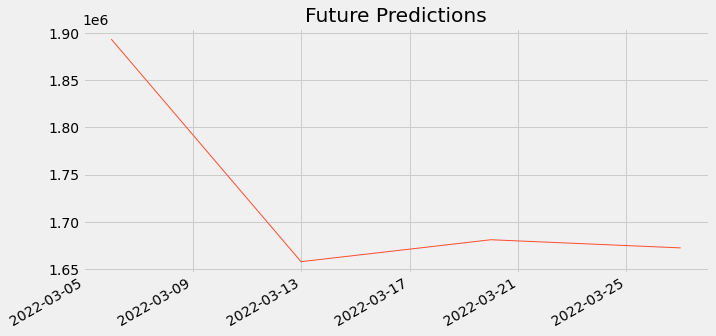

In [283]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[1],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

___